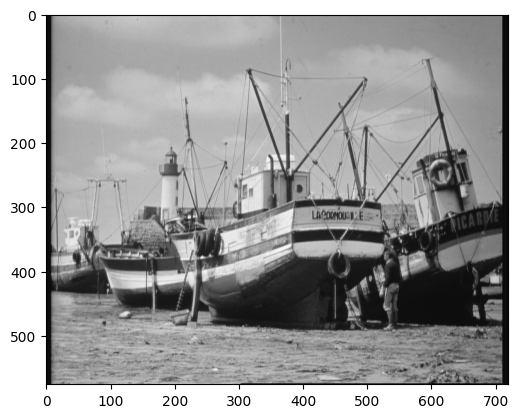

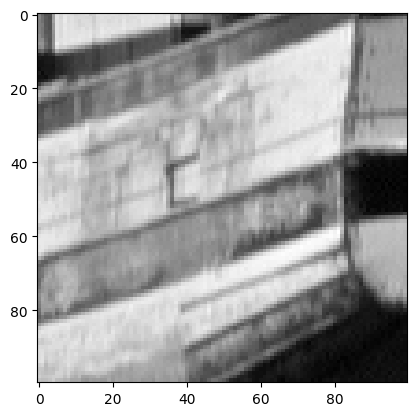

(100, 100)


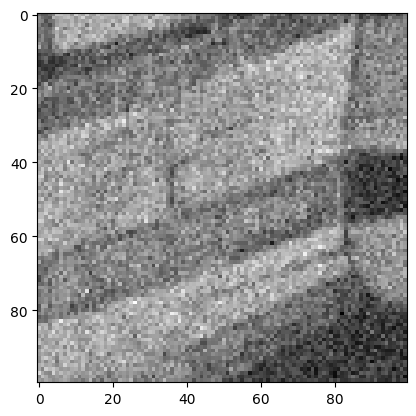

In [10]:
# Alex Domagala
# ECE 6560

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('../images/boats.bmp')
img = np.array(img)
plt.imshow(img, cmap='gray')
plt.show()
img = img[300:400,300:400]
plt.imshow(img, cmap='gray')
plt.show()
print(img.shape)
noise = 30*np.random.randn(img.shape[0],img.shape[1]) # standard normal distribution

# #salt and pepper noise
# for i in range(img.shape[0]):
#   for j in range(img.shape[1]):
#     if (np.random.randint(0, 100) == 3):
#       img[i][j] = 255



img = img + noise
plt.imshow(img, cmap='gray')
plt.show()

In [3]:
def Ix(I,i,j):
  return (I[i-1,j] - I[i+1,j]) / 2

def Iy(I,i,j):
  return (I[i,j-1] - I[i,j+1]) / 2

def Ixx(I,i,j):
  return (I[i-1,j] - 2*I[i,j] + I[i+1,j])

def Iyy(I,i,j):
  return (I[i,j-1] - 2*I[i,j] + I[i,j-1])

def Ixy(I,i,j):
  return (I[i+1,j-1] - I[i,j-1] - I[i-1,j+1] + I[i-1,j]) #https://www.researchgate.net/post/What-is-the-best-way-to-approximate-mixed-derivative

(100, 100)


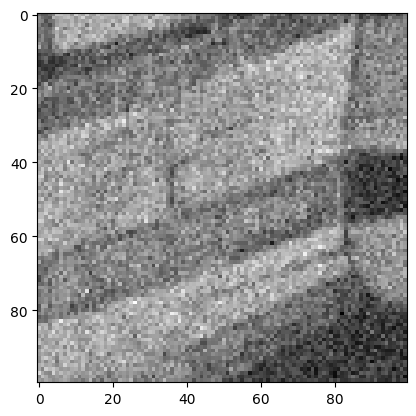

0


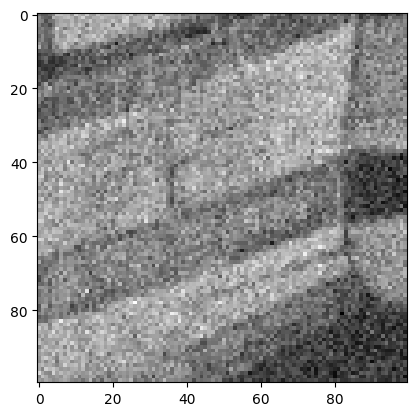

5


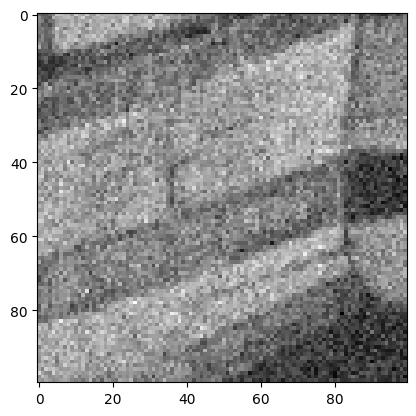

10


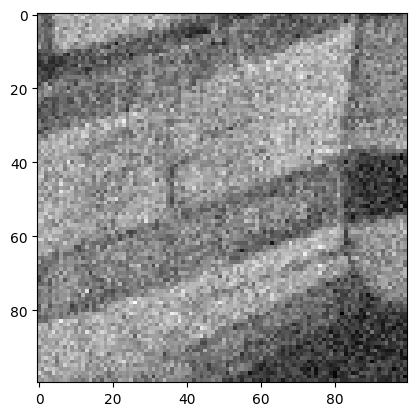

15


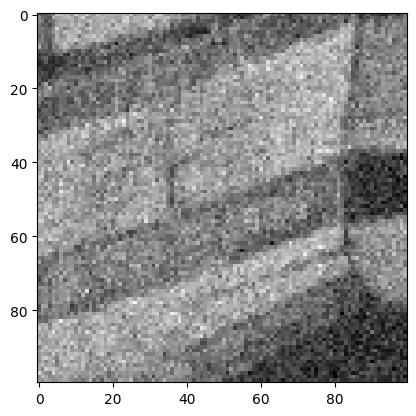

20


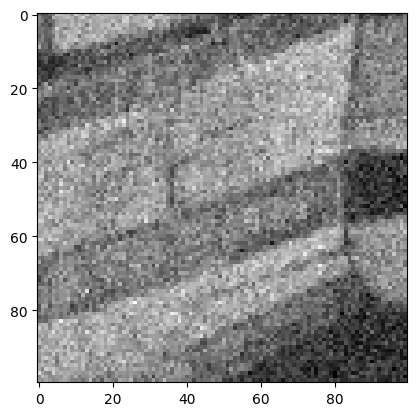

25


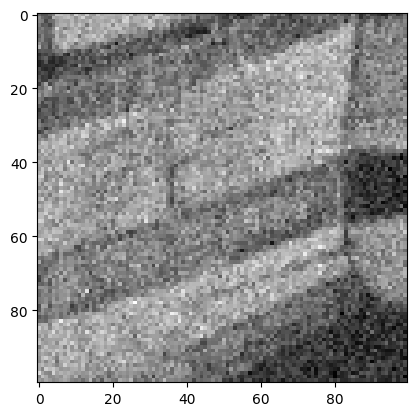

30


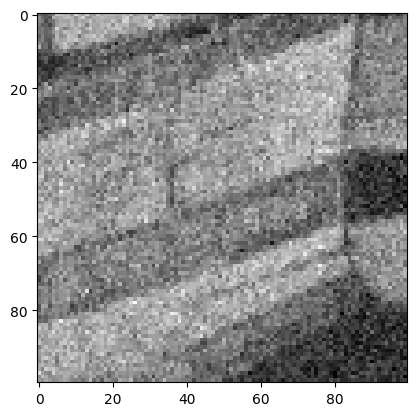

35


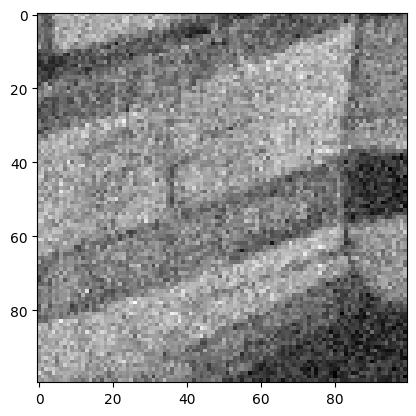

40


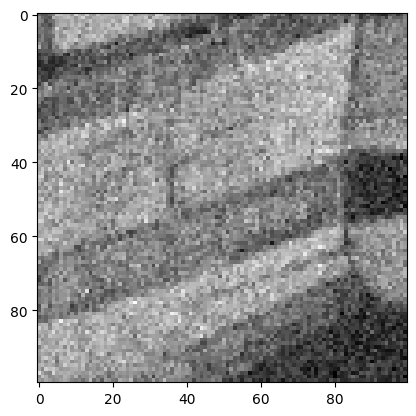

45


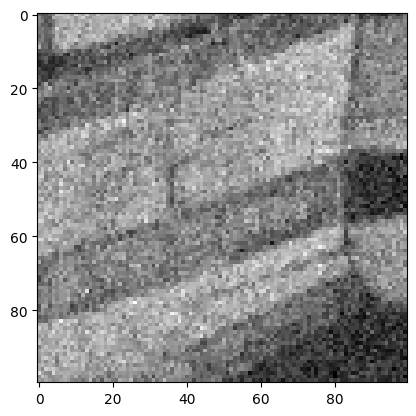

50


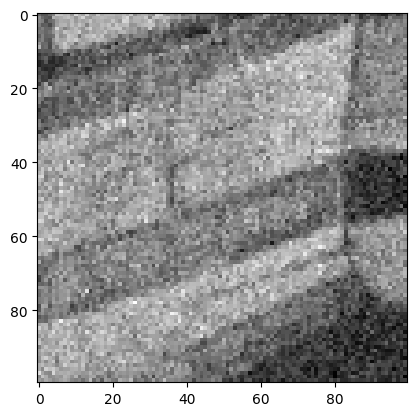

55


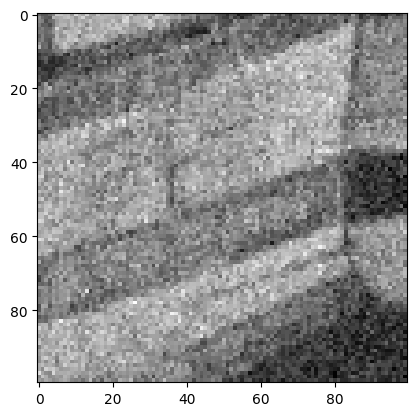

60


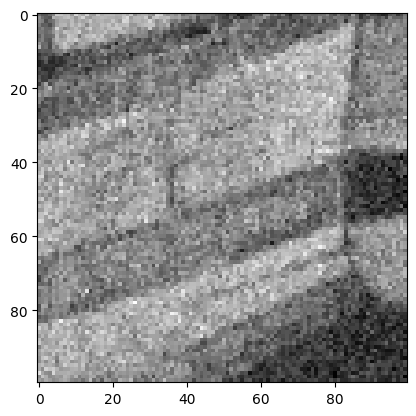

65


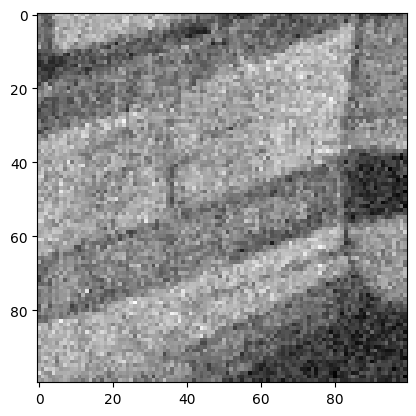

70


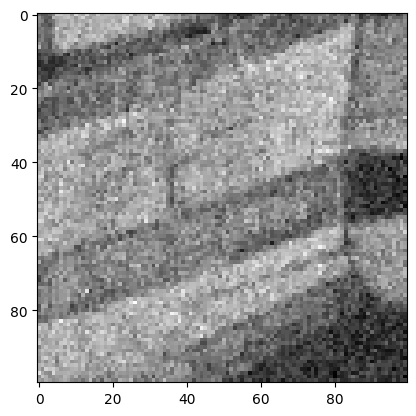

75


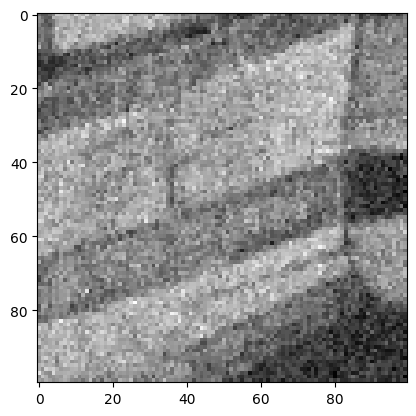

80


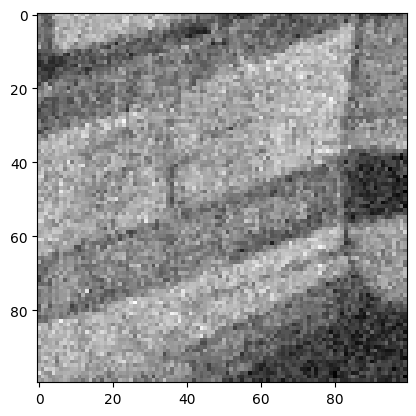

85


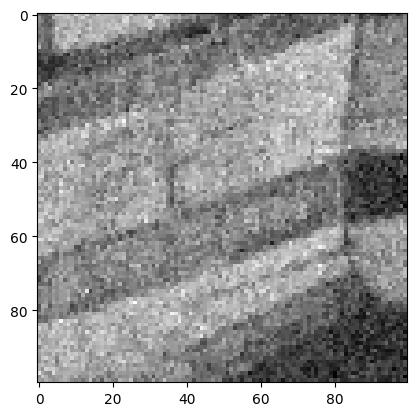

90


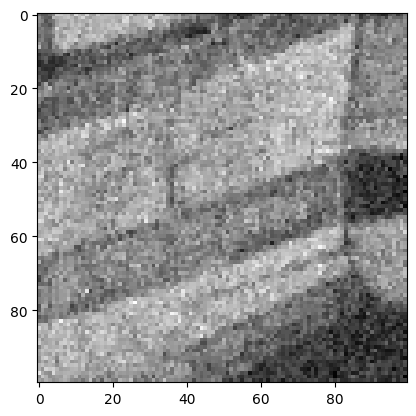

95


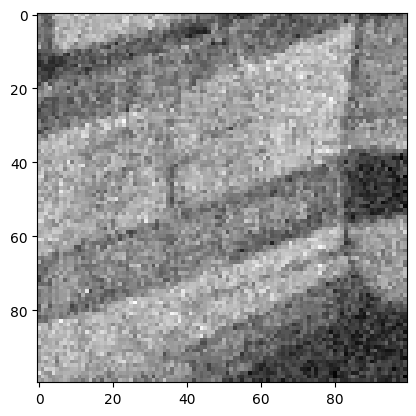

100


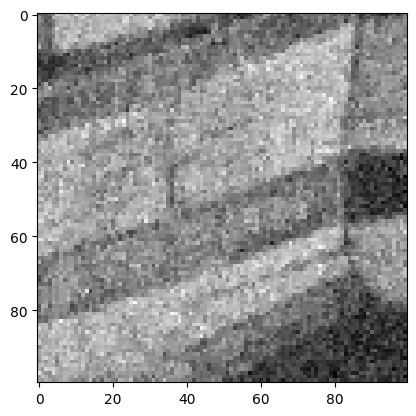

105


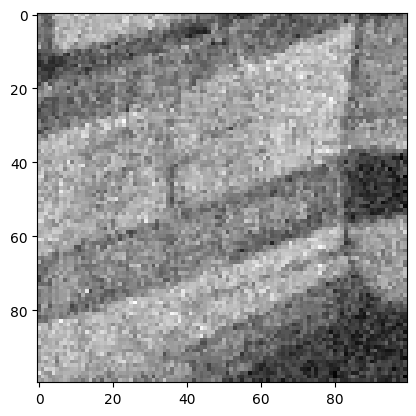

110


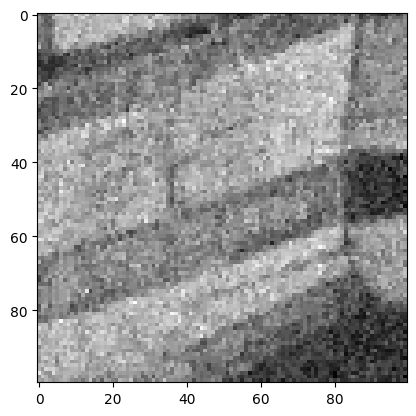

115


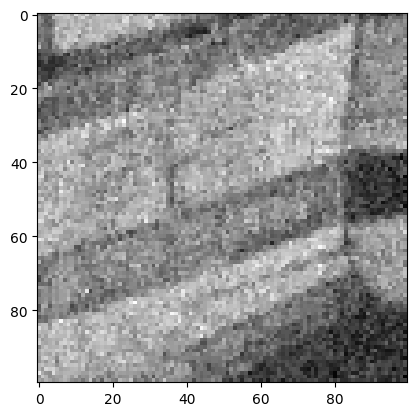

120


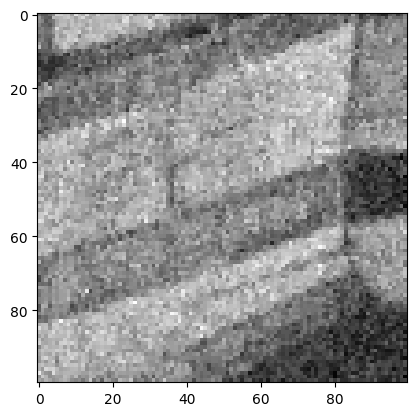

125


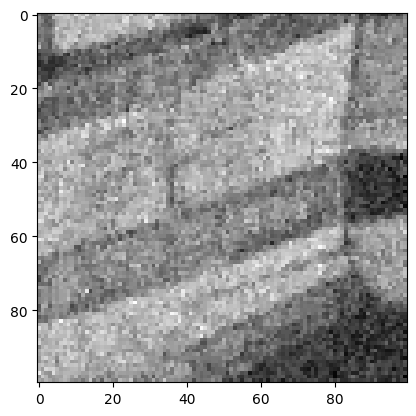

130


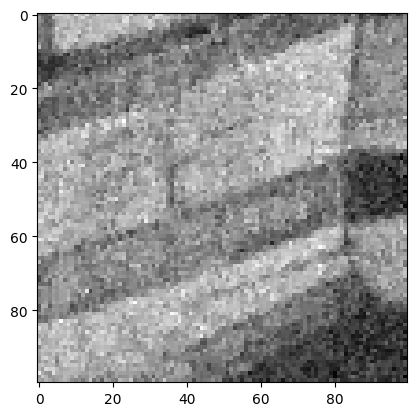

135


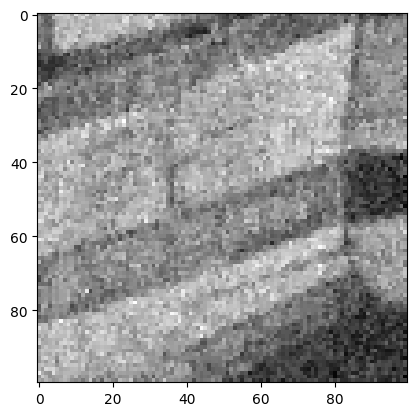

140


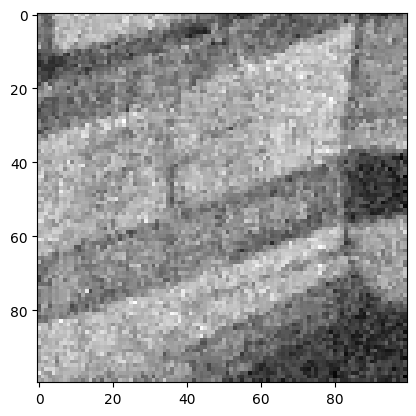

145


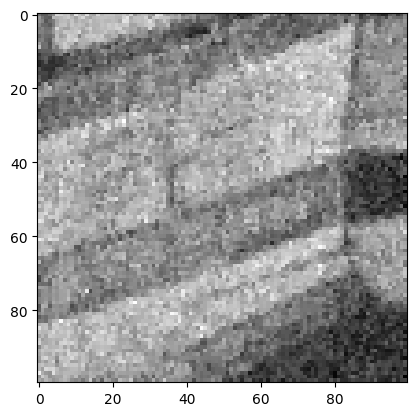

In [11]:
def TV(I):
  E = 4
  timestep = .025
  plt.imshow(I,cmap='gray')
  plt.show()

  # iterate through all the pixels in the image
  for k in range(150):
    for i in range(1,I.shape[0]-1):
      for j in range(1,I.shape[1]-1):
        I[i,j] = I[i,j] + timestep * (((Ix(I,i,j)**2)*Iyy(I,i,j) - 2*Ix(I,i,j)*Iy(I,i,j)*Ixy(I,i,j) + (Iy(I,i,j)**2)*Ixx(I,i,j) + (E**2)*(Ixx(I,i,j) + Iyy(I,i,j))) / (( (Ix(I,i,j)**2) + (Iy(I,i,j)**2) + (E**2) )**(3/2)) )
    if (k % 5 == 0):
      print(k)
      plt.imshow(I,cmap='gray')
      plt.show()

#2 contributions
#1 part multiplies laplacian (linear heat * diffusion coef) (think of as 2d)
#2 part multiplies geometric heat (think of as 1d diffusion)

#CFL condtions come from the respective parts (2 contributions)
#Need to combine those


print(img.shape)
TV(img)